In [1]:
#Importations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

!unzip -u /content/valeursfoncieres.zip
data = pd.read_csv('/content/valeursfoncieres-2022.txt', sep='|', decimal=',')
data2019 = pd.read_csv('/content/valeursfoncieres-2019.txt', sep='|', decimal=',')
data2021 = pd.read_csv('/content/valeursfoncieres-2021.txt', sep='|', decimal=',')

Archive:  /content/valeursfoncieres.zip


<ipython-input-1-d8ff35b2f0c2>:8: DtypeWarning: Columns (18,23,24,26,28,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/valeursfoncieres-2022.txt', sep='|', decimal=',')
<ipython-input-1-d8ff35b2f0c2>:9: DtypeWarning: Columns (18,23,24,26,28,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data2019 = pd.read_csv('/content/valeursfoncieres-2019.txt', sep='|', decimal=',')
<ipython-input-1-d8ff35b2f0c2>:10: DtypeWarning: Columns (18,23,24,26,28,30,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data2021 = pd.read_csv('/content/valeursfoncieres-2021.txt', sep='|', decimal=',')


# Nouvelle section

In [2]:
#Formatage
#Retraits de colonnes
data.drop('Identifiant de document', axis=1)
data.drop('Reference document', axis=1)
data.drop('1 Articles CGI', axis=1)
data.drop('2 Articles CGI', axis=1)
data.drop('3 Articles CGI', axis=1)
data.drop('4 Articles CGI', axis=1)
data.drop('5 Articles CGI', axis=1)
data.drop('Identifiant local', axis=1)

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,NaN,1,2.0,Appartement,24.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,88.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,NaN,1,2.0,Appartement,140.0,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,NaN,NaN,0,NaN,NaN,NaN,NaN,T,NaN,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/12/2022,Vente,...,NaN,NaN,1,4.0,Local industriel. commercial ou assimilé,327.0,0.0,NaN,NaN,NaN
3803881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/12/2022,Vente,...,NaN,NaN,2,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3803882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/12/2022,Vente,...,NaN,NaN,2,2.0,Appartement,40.0,3.0,NaN,NaN,NaN
3803883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/12/2022,Vente,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN


In [3]:
#Format des dates 
data['Date mutation'] = pd.to_datetime(data['Date mutation'])

#Format de l'alias lié à la Corse (2A/2B)
data['Code departement'] = data['Code departement'].astype(str).str.replace('2A','20').str.replace('2B','20').str.replace('971','97').str.replace('972','97').str.replace('973','97').str.replace('974','97').str.replace('976','97').astype(int)

<ipython-input-3-fbc96ee620c4>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date mutation'] = pd.to_datetime(data['Date mutation'])


In [4]:
#Exemples de visualisation
#https://plotly.com/python/plotly-express/
#https://egallic.fr/Enseignement/Python/visualisation-de-donnees.html
#https://gvallverdu.gitbooks.io/python_sciences/content/pandas_capp.html

datafiltre = data[data['Valeur fonciere'] < 300000000]
fig = px.scatter(datafiltre['Date mutation'], datafiltre['Valeur fonciere'])
fig.show()

<ipython-input-5-1dfc09c8ecf2>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0.5, 1.0, 'Volume de ventes (en M€) par mois')

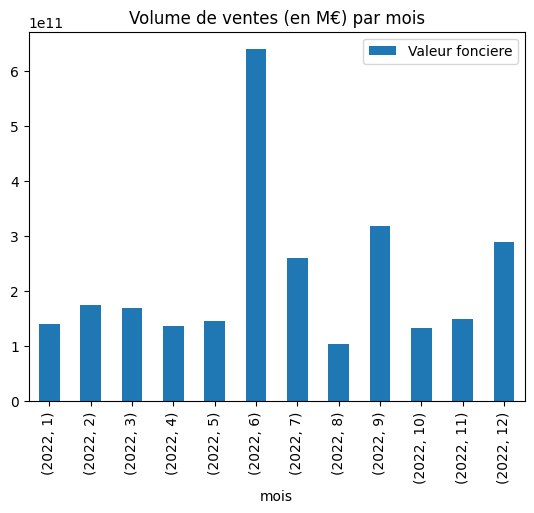

In [5]:
nombreventes_mois = data.groupby('Date mutation').sum()
nombreventes_mois = nombreventes_mois.groupby([nombreventes_mois.index.year.values,nombreventes_mois.index.month.values]).sum()
nombreventes_mois['mois'] = nombreventes_mois.index
nombreventes_mois['mois'] = pd.to_datetime(nombreventes_mois['mois'])
#bins = np.arange(0, nombreventes_mois['Valeur fonciere'].max(), 1000000000)

nombreventes_mois.plot.bar(x='mois', y='Valeur fonciere')
plt.title('Volume de ventes (en M€) par mois')

In [ ]:
#Surface moyenne des terrains en fonction du département de vente
surfacemoyenne_dpt = 

<ipython-input-6-a8f5cd577df2>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



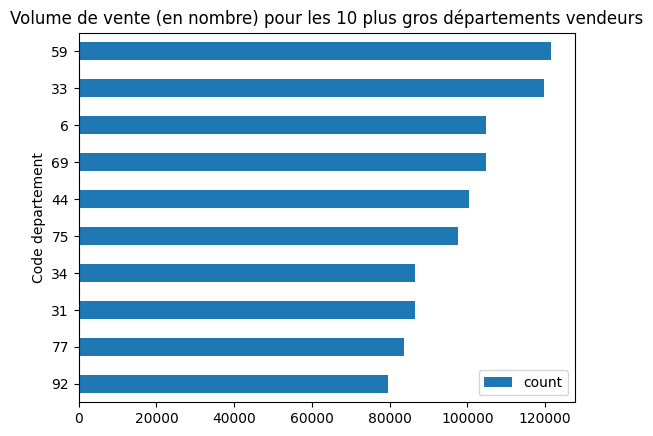

In [6]:
#Département comportant le plus de transactions (par mois)
nombreventes_dpt = data.groupby('Code departement').sum()
nombreventes_dpt['count'] = data['Code departement'].value_counts()
nombreventes_dpt['dept'] = nombreventes_dpt.index

nombreventes_dpt = nombreventes_dpt.sort_values(by=['count'], axis=0, ascending=False)

nombreventes_dpt_10_pgrand = nombreventes_dpt.head(10)
nombreventes_dpt_10_ppetit = nombreventes_dpt.tail(10)
#nombrevente_dpt = nombrevente_dpt.groupby([nombrevente_dpt.index.year.values,nombrevente_dpt.index.month.values]).sum()

nombreventes_dpt_10_pgrand.sort_values(by=['count'], axis=0).plot.barh(y='count')
plt.title('Volume de vente (en nombre) pour les 10 plus gros départements vendeurs')
plt.show()

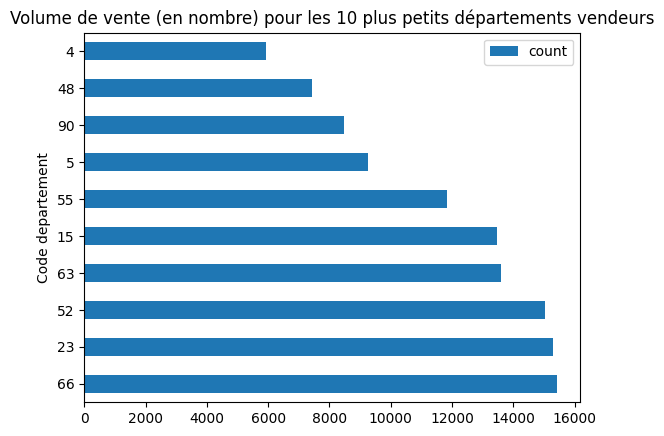

In [7]:
nombreventes_dpt_10_ppetit.plot.barh(y='count')
plt.title('Volume de vente (en nombre) pour les 10 plus petits départements vendeurs')
plt.show()

In [8]:
#Répartition des départements en fonction du volume de transactions
rep_dep_vol_transac = nombreventes_dpt
rep_dep_vol_transac.loc[rep_dep_vol_transac['count'] < 50000, 'dept'] = 'Reste des départements'
fig = px.pie(rep_dep_vol_transac, values='count', names='dept', title='Répartition des départements en fonction du volume de transactions en 2022')
fig.show()

In [ ]:
#Tendance d'évolution de la valeur foncière médiane en 2018, 2019, 2021 et 2022
import statsmodels.api as sm
fig = px.scatter(data, x="Date mutation", y="Valeur fonciere", trendline="ols")
fig.show()